# Question 2

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
plt.rcParams['figure.constrained_layout.use'] = True

from linear_regression import linear_regression
from linear_regression import gradient_descent_linear_regression
from linear_regression import stochastic_descent_linear_regression
from ridge_regression  import ridge_regression
from ridge_regression  import cross_validate_ridge_regression

## Load Data

In [2]:
data_file = "../data/A2Q2Data_train.csv"
data = np.loadtxt(data_file, delimiter=',')

X_train = data[:, 0:100].T
y_train = data[:, 100]

test_file = "../data/A2Q2Data_test.csv"
test = np.loadtxt(test_file, delimiter=',')

X_test = test[:, 0:100].T
y_test = test[:, 100]


## Sub-Question i.

In [3]:
w_ml = linear_regression(X_train=X_train, y_train=y_train)
print(w_ml)
print(np.linalg.norm(w_ml))

with open("../outputs/question2/q2_i_wml.txt", 'w') as f:
    print(w_ml, file=f)

[-7.84961009e-03 -1.36715320e-02 -3.61656438e-03  2.64909160e-03
  1.88551446e-01  2.65314657e-03  9.46531786e-03  1.79809481e-01
  3.73757317e-03  4.99608944e-01  8.35836265e-03  4.29108775e-03
  1.42141179e-02  3.94232414e-03  9.36795890e-03 -1.12038274e-03
  3.35727500e-03  1.16152212e-03 -9.40884707e-03 -2.45575476e-03
 -1.17409629e-02 -1.01960612e-02  7.95771321e-03 -1.00574854e-02
  6.04882939e-03 -4.67345192e-03 -3.09091547e-03  8.14909193e-03
  1.20264599e-02 -6.82458163e-03 -8.65405539e-03  9.86273479e-04
  4.92968011e-03  5.99772461e-03 -1.34667860e-02  1.07075729e-03
  1.32745992e-02 -1.14148742e-02 -2.01056697e-02  5.85096240e-01
  4.94483247e-04 -7.86666920e-04 -2.71926574e-03 -9.54021938e-03
 -5.44161058e-03  9.80679209e-03 -6.72540624e-03 -4.45414276e-04
  6.98516508e-03  3.16138907e-02  4.51763485e-01 -8.75221380e-03
  2.55167390e-03  4.24921150e-03  2.89847927e-01  7.03723255e-03
 -1.95796946e-03  1.41523883e-02 -1.06508170e-02  7.72743903e-01
 -5.67126044e-03 -6.30026

## Sub-Question ii.

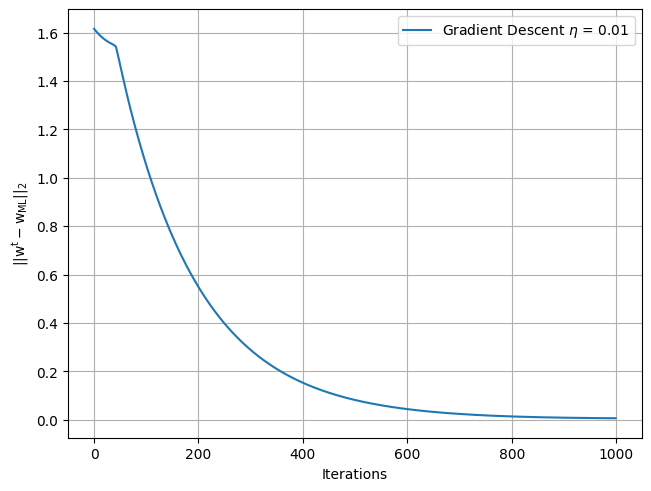

In [4]:
rates = [1e-2]
legend = []
for rt in rates:
    wg, arr_g = gradient_descent_linear_regression(X_train, y_train,
                                                   iterations = 1000,
                                                   learning_rate=rt)
    plt.plot(arr_g)
    plt.xlabel("Iterations")
    legend.append(f"Gradient Descent $\eta$ = {rt}")
    plt.ylabel(r"$|| \text{w}^{\text{t}} - \text{w}_{\text{ML}} ||_{2}$")
    plt.grid("on")

plt.legend(legend)
plt.savefig("../outputs/question2/q2_ii_gradient_descent.png")

## Sub-Question iii.

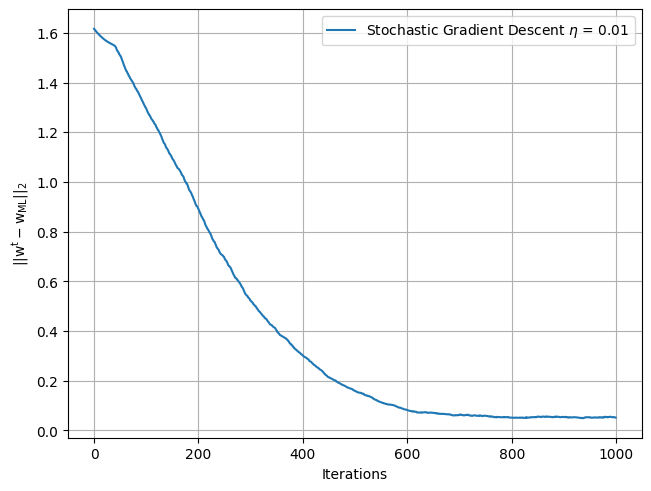

In [5]:
rates = [1e-2]
legend = []
for rt in rates:
    ws, arr_s = stochastic_descent_linear_regression(X_train, y_train,
                                                     batch_size=100,
                                                     iterations = 1000,
                                                     learning_rate=rt)
    plt.plot(arr_s)
    plt.xlabel("Iterations")
    legend.append(f"Stochastic Gradient Descent $\eta$ = {rt}")
    plt.ylabel(r"$|| \text{w}^{\text{t}} - \text{w}_{\text{ML}} ||_{2}$")
    plt.grid("on")

plt.legend(legend)
plt.savefig("../outputs/question2/q2_iii_stochastic_descent.png")

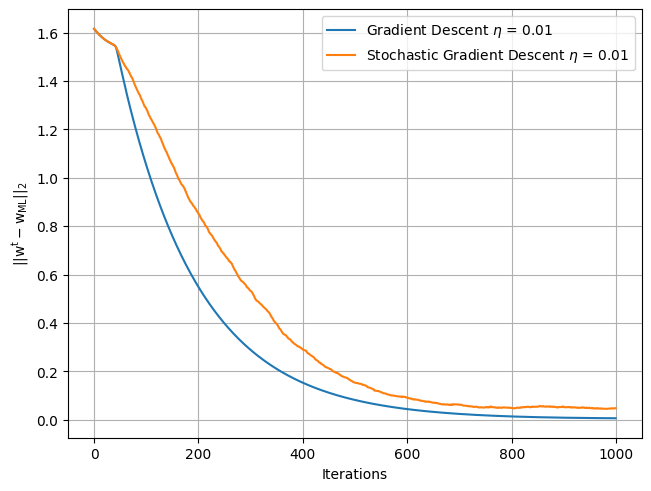

In [6]:
rate_s = 1e-2
rate_g = 1e-2

ws, arr_s = stochastic_descent_linear_regression(X_train, y_train,
                                                 batch_size=100,
                                                 iterations = 1000,
                                                 learning_rate=rate_s)

wg, arr_g = gradient_descent_linear_regression(X_train, y_train,
                                               iterations = 1000,
                                               learning_rate=rate_g)




plt.plot(arr_g)
plt.plot(arr_s)
plt.legend([f"Gradient Descent $\eta$ = {rate_g}", f"Stochastic Gradient Descent $\eta$ = {rate_s}"])
plt.xlabel("Iterations")
plt.ylabel(r"$|| \text{w}^{\text{t}} - \text{w}_{\text{ML}} ||_{2}$")
plt.grid("on")
plt.savefig("../outputs/question2/q2_ii_iii_combined.png")

## Sub-Question iv.

### Cross Validation

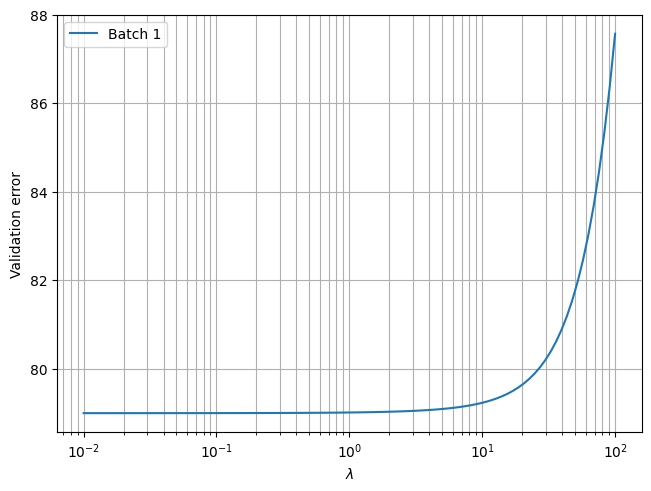

In [7]:
val_errors = cross_validate_ridge_regression(X_train=X_train,
                                             y_train=y_train,
                                             split=0.2,
                                             k_fold=False,
                                             lams=np.logspace(-2, 2, 100),
                                             iterations=1000,
                                             learning_rate=0.01,
                                             batches=1,
                                             seed=0)
legend = []
for i in range(val_errors.shape[0]):
    plt.semilogx(val_errors[i, :, 0], val_errors[i, :, 1])
    legend.append(f"Batch {i+1}")

plt.grid(True, which="both")
plt.xlabel(r"$\lambda$")
plt.ylabel("Validation error")
plt.legend(legend)
plt.savefig("../outputs/question2/q2_iv_cross_val.png")
plt.show()



### Choosing best $\lambda$

In [8]:
best_lam_idx = [np.argmin(val_errors[i, :, 1]) for i in range(val_errors.shape[0])]
lams = [val_errors[i, idx, 0] for i, idx in enumerate(best_lam_idx)]
print(lams)
cross_lam = np.sum(lams)/len(lams)

[0.01]


### K Fold Cross Validation

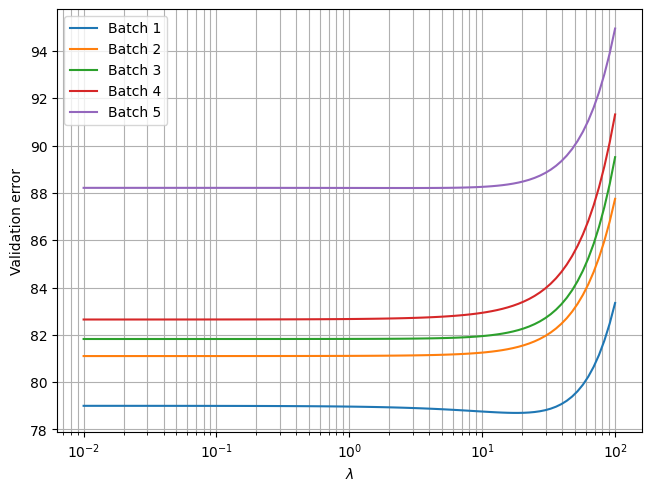

In [9]:
val_errors = cross_validate_ridge_regression(X_train=X_train,
                                             y_train=y_train,
                                             split=0.2,
                                             k_fold=True,
                                             lams=np.logspace(-2, 2, 100),
                                             iterations=1000,
                                             learning_rate=0.01,
                                             seed=0)
legend = []
for i in range(val_errors.shape[0]):
    plt.semilogx(val_errors[i, :, 0], val_errors[i, :, 1])
    legend.append(f"Batch {i+1}")

plt.grid(True, which="both")
plt.xlabel(r"$\lambda$")
plt.ylabel("Validation error")
plt.legend(legend)
plt.savefig("../outputs/question2/q2_iv_k_fold_val.png")
plt.show()



### Choosing best $\lambda$

In [10]:
best_lam_idx = [np.argmin(val_errors[i, :, 1]) for i in range(val_errors.shape[0])]
lams = [val_errors[i, idx, 0] for i, idx in enumerate(best_lam_idx)]
print(lams)
kfold_lam = np.sum(lams)/len(lams)

[18.73817422860385, 0.01, 0.01, 0.01, 2.656087782946687]


### Testing

In [11]:
w_ml = linear_regression(X_train=X_train, y_train=y_train)

# cross validation
wr_c = ridge_regression(X_train=X_train,
                        y_train=y_train,
                        lam=cross_lam,
                        iterations=1000,
                        learning_rate=0.01)

# k fold cross validation
wr_k = ridge_regression(X_train=X_train,
                        y_train=y_train,
                        lam=kfold_lam,
                        iterations=1000,
                        learning_rate=0.01)


test_errors = []
train_errors = []

for wi in [w_ml, wr_c, wr_k]:
    test_errors.append((np.linalg.norm(((X_test.T)@wi) - y_test)**2))
    train_errors.append((np.linalg.norm(((X_train.T)@wi) - y_train)**2))

test_errors = np.array(test_errors)
train_errors = np.array(train_errors)

methods = ["Least Squares",
           "Ridge Regression (Cross Validation)", 
           "Ridge Regression (K fold)"]

disp_lam = ["-", f"{cross_lam}", f"{kfold_lam}"]
error_table = pd.DataFrame.from_dict({"  ":methods,
                                      r"$\lambda$":disp_lam,
                                      "Test Error":test_errors,
                                      "MSE (Test Error / number of points)":test_errors/(X_test.shape[1])
                                     })
display(error_table)

# save data to text files
with open(f"../outputs/question2/q2_iv_error_table.tex", 'w') as f:
    f.write(error_table.to_latex(index=False, 
                               float_format="{:.7f}".format))

,,$\lambda$,Test Error,MSE (Test Error / number of points)
0,Least Squares,-,185.363656,0.370727
1,Ridge Regression (Cross Validation),0.01,184.787966,0.369576
2,Ridge Regression (K fold),4.284852402310109,183.907757,0.367816


### Testing random lambdas

In [12]:
random_lams = [1e0, 1e1, 1e3, 1e4 ,1e5]
random_test_errors = []
random_train_errors = []

disp_lam = ["-"]
methods = ["Least Squares"]

random_test_errors.append((np.linalg.norm(((X_test.T)@w_ml) - y_test)**2))
random_train_errors.append((np.linalg.norm(((X_train.T)@w_ml) - y_train)**2))

for lam in random_lams:
    wr = ridge_regression(X_train=X_train,
                          y_train=y_train,
                          lam=lam,
                          iterations=1000,
                          learning_rate=0.01)

    random_test_errors.append((np.linalg.norm(((X_test.T)@wr) - y_test)**2))
    random_train_errors.append((np.linalg.norm(((X_train.T)@wr) - y_train)**2))
    disp_lam.append(f"{lam}")
    methods.append("Ridge Regression")

random_test_errors = np.array(random_test_errors)
random_train_errors = np.array(random_test_errors)
    
error_table = pd.DataFrame.from_dict({"  ":methods,
                                      r"$\lambda$":disp_lam,
                                      "Test Error":random_test_errors,
                                      "MSE (Test Error / number of points)":random_test_errors/(X_test.shape[1])
                                     })
display(error_table)

# save data to text files
with open(f"../outputs/question2/q2_iv_random_error_table.tex", 'w') as f:
    f.write(error_table.to_latex(index=False, 
                               float_format="{:.7f}".format))

,,$\lambda$,Test Error,MSE (Test Error / number of points)
0,Least Squares,-,185.363656,0.370727
1,Ridge Regression,1.0,184.582878,0.369166
2,Ridge Regression,10.0,182.752510,0.365505
3,Ridge Regression,1000.0,119.106262,0.238213
4,Ridge Regression,10000.0,108.094372,0.216189
5,Ridge Regression,100000.0,323.680481,0.647361
